# Análisis exploratorio de datos

## 1. Introducción 

El conjunto de datos que se pretende analizar en este notebook se denomina **EXIST** y representa un problema de **detección y clasificación de sexismo** a partir de conjuntos de **textos en español e inglés** procedentes de las redes sociales **Twitter y Gab**. Esta temática surge en un formato competitivo teniendo lugar su primera edición en el año 2021 con una segunda recientemente terminada en el presente año 2022.

En este notebook se detallan los aspectos más relevantes acerca de la **composición de los conjuntos de entrenamiento y validación, así como análisis estadísticos y visuales** que ayuden a comprender tanto la temática como los datos disponibles para abordarla. Para ello se ha hecho uso de los artículos [*Overview of EXIST 2021*](http://diposit.ub.edu/dspace/bitstream/2445/181257/1/715155.pdf) y [*Overview of EXIST 2022*](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwij_P6v_dr7AhVsXqQEHVePCWIQFnoECA4QAQ&url=http%3A%2F%2Fjournal.sepln.org%2Fsepln%2Fojs%2Fojs%2Findex.php%2Fpln%2Farticle%2Fview%2F6443&usg=AOvVaw3lrB02zOxmsnIoeiyGQBqA), en los que se describe la motivación y los objetivos del problema del sexismo, los procesos de recolección de datos, normativa de la competición, evaluación de resultados y las propuestas de los participantes.

## 2. Estructura del notebook

1. Introducción al notebook
2. Estructura del notebook
3. Recopilación de datos
4. Muestreo de datos
5. Etiquetado de datos
6. Instalación y carga de librerías
7. Lectura y carga de datos
8. Análisis de características
9. Análisis de textos
10. Conclusiones finales

## 3. Recopilación de datos

El proceso de recolección de datos fue orientado primeramente a establecer un **conjunto de expresiones populares y términos sexistas**, en español e inglés, que manifiestan una infravolaración hacia el rol de la mujer en la sociedad. Para ello se inspiraron en trabajos previamente realizados en el mismo área, cuentas y hashtags populares de redes sociales, etc. A continuación se resumen los métodos de recolección de datos diferenciados por la red social tomada como fuente de datos.

### 3.1. Twitter

La recogida de datos procedentes de esta plataforma social se elaboró en **dos períodos**, una primera fase de Diciembre de 2020 hasta Febrero de 2021 para componer la **primera versión** de un dataset de entrenamiento y otro de validación. Mientras que en la **segunda edición** de la competición el objetivo consistía en **ampliar el conjunto de datos de validación** y por ende se realizó una segunda fase de recopilación de tweets durante el mes de Enero de 2022. En sendos intervalos se aplicaron **técnicas de balanceado**, como la eliminación de documentos, para equilibrar el número de textos en inglés y español.

### 3.2. Gab

Únicamente se celebró **una etapa** de recolección de datos desde **2016 hasta 2019** resultando en millones de textos en inglés, mientras que apenas se obtuvieron dos mil documentos en español. En este caso no se aplicaron técnicas de balanceado entre idiomas por lo que el conjunto de datos procedente de esta red social está prácticamente **sesgado hacia el inglés** en su totalidad.

## 4. Muestreo de datos

En esta segunda fase se pretende valorar la calidad de las muestras recopiladas en función de las expresiones y términos sexistas establecidos que componen las bases de la población de textos con la que se pretende aboradar el problema. De nuevo se llevaron a cabo dos procedimientos diferentes dependiendo de la fuente de datos.

### 4.1. Twitter

Tras diversos análisis estadísticos pudieron confirmar que el conjunto de tweets recopilados se caracterizaban por una **distribución uniforme**, por lo que para **cada expresión y término** considerados, se asignó un **volumen de tweets representativos** con los que componer un dataset de entrenamiento y otro de validación.

### 4.2. Gab

En esta segunda fuente de datos los resultados estadísticos **no** pudieron determinar la presencia de una **distribución uniforme**, por lo que el proceso de selección de instancias aplicado fue diferente. 

1. En primer lugar se **eliminaron aquellos textos con información personal** de los autores, de modo que se redujese el sesgo introducido por los usuarios. 

2. A continuación se fijaron **intervalos temporales diferenciables** para seleccionar las muestras del conjunto de entrenamiento y de validación, decrementando así el sesgo temporal existente. 

3. Posteriormente se impuso una **primera restricción** en la que **cada usuario** debía estar ligado, al menos a **un texto**, aunque en el caso de documentos españoles esta cifra se elevó a dos publicaciones por usuario. 

4. Finalmente la **segunda restricción** se basó en la única aparición de **cada usuario en un conjunto de datos**: entrenamiento o validación, para evitar que una misma cuenta perteneciese a ambos.

## 5. Etiquetado de datos

En ambas ediciones de la competición datadas en 2021 y 2022 se conformaron varios **equipos de expertos en sexismo** con diversos grados de experiencia para etiquetar manualmente los textos recopilados. En los **primeros experimentos** los expertos disponían de una **menor experiencia**, mientras que en las **últimas iteraciones los más experimentados** terminaban de corregir las etiquetas del conjunto final *EXIST*.

Una de las principales diferencias existentes en este procedimiento de etiquetado entre las ediciones de 2021 y 2022 fue el uso de una **plataforma de ayuda al etiquetado de datos denominada AWS MTurk** *(Amazon Mechanical Turk)* que se empleó en combinación con un equipo de expertos utilizando un sistema de voto mayoritario para elegir la clase de cada instancia. Debido a que **AWS MTurk no es capaz de procesar emojis** estos fueron **convertidos en texto** reemplazándolos por sus correspondientes descripciones en lenguaje natural.

## 6. Instalación y carga de librerías

Este apartado tiene como único propósito cargar las librerías y dependencias necesarias para la ejecución de este notebook, así como las funciones propiamente desarrolladas. Previo a ello deberán ser instaladas bien ejecutando el script *setup.sh* mediante el comando `bash setup.sh` con permisos de ejecución en distribuciones Linux, o bien ejecutando el compando `pip install -r requirements.txt`.

In [1]:
# collections: to use collection data structures
from collections import Counter

# matplotlib: to view data and statistics charts
import matplotlib.pyplot as plt

# wordcloud: to view frequent word charts
from wordcloud import WordCloud

# textblob: model to predict the sentiment of a text
from textblob import TextBlob

# Path to the developped functions
import sys
sys.path.append('../scripts')

# Data read and compute functions
from data import *

# Text processing functions
from processing import *

[nltk_data] Downloading package stopwords to /home/lidia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 7. Lectura y carga de datos

En esta segunda sección se pretende **cargar los datasets de entrenamiento y validación** procedentes de los correspondientes ficheros situados en la carpeta *data*. Al tener un **formato TSV** se deben leer como tablas aunque posteriormente se trabaje con ellos en formato *dataframe*. 

Tal y como se puede comprobar en los siguientes resultados las dimensiones de sendos conjuntos de datos se detallan a continuación:

* Conjunto de entrenamiento: **6.977 muestras**.
* Conjunto de validación: **4.368 muestras**.

In [2]:
# Read EXIST datasets
training_df = read_training_dataset()
testing_df = read_testing_dataset()

# Show the dimensions of the datasets
print("Training dataset dimensions:", training_df.shape)
print("Testing dataset dimensions:", testing_df.shape)

Training dataset dimensions: (6977, 7)
Testing dataset dimensions: (4368, 7)


## 8. Análisis de características

Este primer análisis consiste en conocer el número de columnas, tipos de datos y significados con el objetivo de comprender los datos que se proporcionan sendos datasets. Según la información recopilada del artículo [*Overview of EXIST 2022*](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwij_P6v_dr7AhVsXqQEHVePCWIQFnoECA4QAQ&url=http%3A%2F%2Fjournal.sepln.org%2Fsepln%2Fojs%2Fojs%2Findex.php%2Fpln%2Farticle%2Fview%2F6443&usg=AOvVaw3lrB02zOxmsnIoeiyGQBqA), a continuación se detalla cuál es la naturaleza de cada una de las columnas disponibles: 

* `test_case`: columna nominal que indica la edición de la competición a la que pertenece un registro.
* `id`: columna numérica que representa un identificador único para un registro.
* `source`: columna nominal que define la fuente de la que procede un texto, Twitter o Gab.
* `language`: columna nominal que define el idioma de un texto, inglés (*en*) o español (*es*).
* `text`: columna nominal con el contenido de un texto.
* `task1`: columna nominal que representa la variable a predecir que indica si un texto es sexista (*sexist*) o no (*non-sexist*).
* `task2`: columna nominal que representa la categoría sexista a la que pertenece un texto.

A continuación se calcula la frecuencia de los valores nominales de las columnas categóricas más relevantes para abordar el problema del sexismo y acerca de ellos se pueden obtener las siguientes conclusiones:

* En el conjunto de **entrenamiento** únicamente se encuentran textos procedentes de **Twitter**.

* Se confirma de nuevo el equilibrio entre los tweets redactados en español e inglés, con un aumento liviano en los textos españoles.

* Si bien las clases *sexist* y *non-sexist* se encuentran balanceadas, hay una **ligera diferencia incremental de textos no sexistas**.

* Finalmente se puede apreciar la existencia de un **mayor número de tweets de ideología y estereotipos** sexistas, los documentos **más difíciles de detectar** por modelos de Aprendizaje Automático debido a que el nivel de sexismo presentado es inferior al de otros textos, como los de violencia de género y sexual.


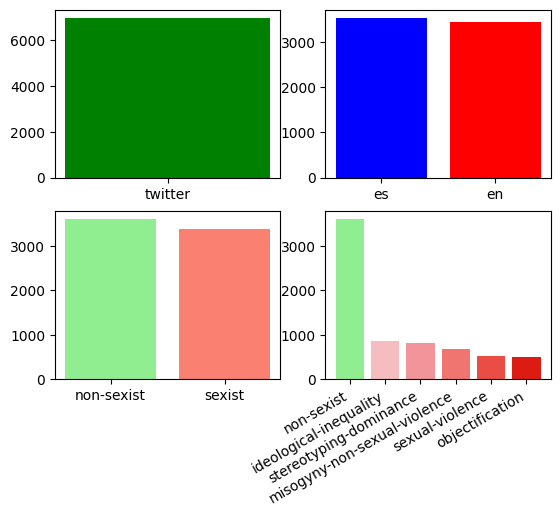

In [3]:
# Create a grid for four charts
fig, axs = plt.subplots(2,2)

# List of columns to plot and their positions
column_chart_positions = {
    "source": (0,0), 
    "language": (0,1), 
    "task1": (1,0), 
    "task2": (1,1)
}

# Class label colors
column_chart_colors = {
    "source": ["green", "cyan"], 
    "language": ["blue", "red"], 
    "task1": ["lightgreen", "salmon"], 
    "task2": ["lightgreen", "#f6bdc0", "#f1959b", "#f07470", "#ea4c46", "#dc1c13"]
}

# Compute the frequency per class label and sort the quantities before plotting them
for column in column_chart_positions:
    frequency = dict(Counter(list(training_df[column].values)))
    sorted_frequency = dict(sorted(frequency.items(), key=lambda item: item[1], reverse=True))
    axs[column_chart_positions[column]].bar(
        list(sorted_frequency.keys()),
        list(sorted_frequency.values()),
        color=column_chart_colors[column])

# Add some space between the X labels of the last chart
plt.xticks(rotation=30, ha='right')       
plt.show()

Si se replica el mismo análisis de frecuencias sobre el dataset de **validación** se pueden determinar los siguientes aspectos:

* A diferencia del conjunto de entrenamiento, en este sí que **aparecen textos procedentes de la red social Gab** aunque en una cifra sumamente **minoritaria** con respecto al número de tweets.

* Si bien el volumen de documentos en inglés y español continua siendo equilibrado, en este conjunto es el inglés el que cuenta con una mayor representatividad.

* Adicionalmente también se modifica el *ranking* de las categorías sexistas, siendo la misoginia una de las más voluminosas a diferencia del dataset de entrenamiento.

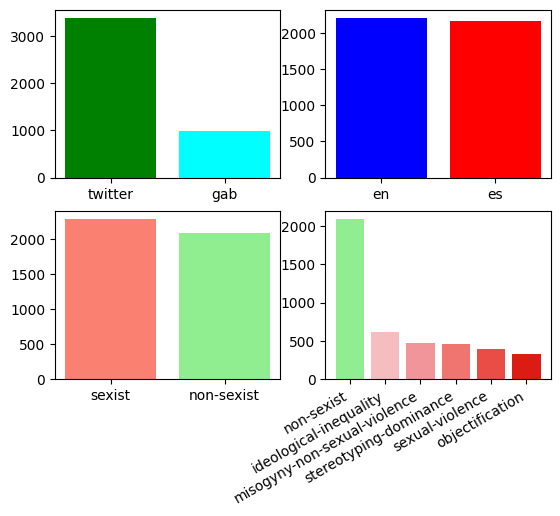

In [4]:
# Create a grid for four charts
fig, axs = plt.subplots(2,2)

# List of columns to plot and their positions
column_chart_positions = {
    "source": (0,0), 
    "language": (0,1), 
    "task1": (1,0), 
    "task2": (1,1)
}

# Class label colors
column_chart_colors = {
    "source": ["green", "cyan"], 
    "language": ["blue", "red"], 
    "task1": ["salmon", "lightgreen"], 
    "task2": ["lightgreen", "#f6bdc0", "#f1959b", "#f07470", "#ea4c46", "#dc1c13"]
}

# Compute the frequency per class label and sort the quantities before plotting them
for column in column_chart_positions:
    frequency = dict(Counter(list(testing_df[column].values)))
    sorted_frequency = dict(sorted(frequency.items(), key=lambda item: item[1], reverse=True))
    axs[column_chart_positions[column]].bar(
        list(sorted_frequency.keys()),
        list(sorted_frequency.values()),
        color=column_chart_colors[column])
        
# Add some space between the X labels of the last chart
plt.xticks(rotation=30, ha='right')       
plt.show()

## 9. Análisis de textos

En esta última sección el objetivo consiste en realizar diversos análisis estadísticos y visualizaciones basadas en técnicas de **Procesamiento del Lenguaje Natural** (*NLP*). Como paso previo es necesario aplicar algunos métodos de procesamiento basados en textos con los que limpiar y preparar los documentos objetivos.

### 9.1. Procesamiento de textos

Las técnicas elegidas han sido fundamentadas en **análisis exploratorios visuales de los textos** con el fin de comprobar el tipo de caracteres que contienen y el grado de información que aportan para futuros estudios.

1. Eliminar direcciones URL, menciones de usuarios y *hashtags*.
2. Eliminar todos aquellos caracteres no alfabéticos.
3. Eliminar *stopwords*, en inglés y en español, sin perder las estructuras de los textos.
4. Convertir todos los caracteres restantes a minúsculas.

### 9.2. Análisis estadísticos basados en texto

El propósito de esta sección consiste en mostrar gráficos estadísticos acerca de la **distribución de caracteres y palabras** considerando tanto los textos originales como documentos procesados. Este procedimiento será aplicado sobre sendos conjuntos de datos, entrenamiento y validación, con el fin de comprobar si existen diferencias significativas entre ambos datasets que deban ser consideradas en sus respectivas fases durante el entrenamiento de modelos.

#### 9.2.1. Frecuencia de caracteres

Comienza el análisis empleando el **conjunto de entrenamiento**. Observando la figura superior izquierda se puede apreciar que en la distribución de los **textos originales** las **mayores frecuencias** se concentran al **comienzo del intervalo**, lo que indica que prácticamente la totalidad de los documentos disponen de entre 0 y 300 caracteres. Una explicación lógica reside en la **limitación de caracteres** que presenta la única fuente de datos de la que proceden los textos: Twitter. Sin embargo, en figura inferior izquierda se puede afirmar que el **procesamiento de textos** parece aportar dos principales ventajas: ayuda a **reducir el número de caracteres** total y a **normalizar las frecuencias** de caracteres puesto que su distribución presenta unas cifras más equitativas, favoreciendo la diversidad y flexibilizando la naturaleza de los textos.

Replicando el mismo procedimiento sobre el **conjunto de validación** se aprecia una disminución bastante drástica acerca de las diferencias de **distribuciones de los textos originales y procesados** puesto que prácticamente **son idénticas**. En ambos casos la inmensa mayoría de documentos se caracterizan por tener una **menor longitud** que los textos de entrenamiento.

/home/lidia/DATCOM-TFM/notebooks/../scripts/processing.py:45: FutureWarning: The default value of regex will change from True to False in a future version.
  .replace("@([a-zA-Z0-9_]{1,50})", "")
/home/lidia/DATCOM-TFM/notebooks/../scripts/processing.py:63: FutureWarning: The default value of regex will change from True to False in a future version.
  .replace("#([a-zA-Z0-9_]{1,50})", "")
/home/lidia/DATCOM-TFM/notebooks/../scripts/processing.py:82: FutureWarning: The default value of regex will change from True to False in a future version.
  .replace("[^a-zA-Z ]", "")
/home/lidia/DATCOM-TFM/notebooks/../scripts/processing.py:45: FutureWarning: The default value of regex will change from True to False in a future version.
  .replace("@([a-zA-Z0-9_]{1,50})", "")
/home/lidia/DATCOM-TFM/notebooks/../scripts/processing.py:63: FutureWarning: The default value of regex will change from True to False in a future version.
  .replace("#([a-zA-Z0-9_]{1,50})", "")
/home/lidia/DATCOM-TFM/notebook

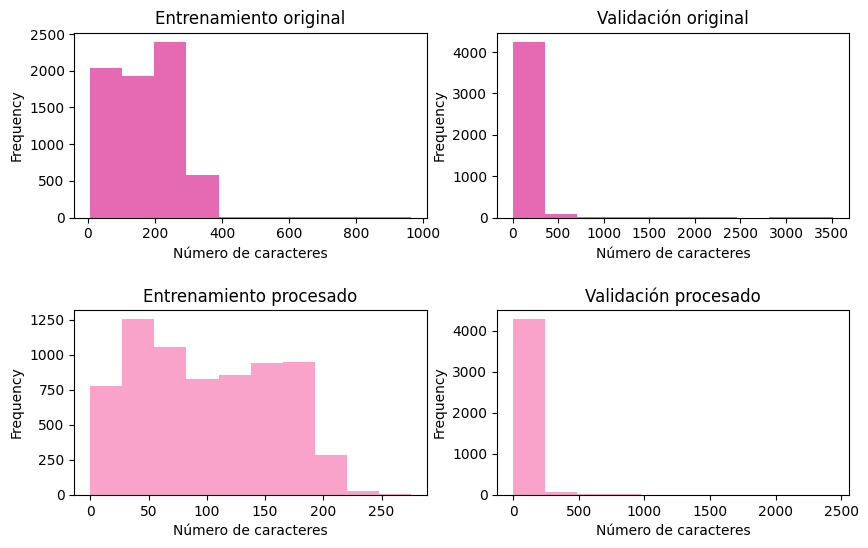

In [3]:
# Text processing for training and testing datasets
training_df = text_processing_pipeline(training_df, "text")
testing_df = text_processing_pipeline(testing_df, "text")

# Create a grid for 4 charts
fig, ax = plt.subplots(2, 2, figsize=(10,6))

# X and Y labels
ax[0][0].set_xlabel("Número de caracteres")
ax[0][1].set_xlabel("Número de caracteres")
ax[1][0].set_xlabel("Número de caracteres")
ax[1][1].set_xlabel("Número de caracteres")

# Char frequency for ORIGINAL texts in training and testing datasets
training_df["text"].str.len().plot(
    ax=ax[0][0],
    kind="hist", 
    grid=False, 
    color="#e56ab3", 
    title="Entrenamiento original")
testing_df["text"].str.len().plot(
    ax=ax[0][1],
    kind="hist", 
    grid=False, 
    color="#e56ab3", 
    title="Validación original")

# Char frequency for PREPROCESSED texts in training and testing datasets
training_df["cleaned_text"].str.len().plot(
    ax=ax[1][0],
    kind="hist", 
    grid=False, 
    color="#f9a3cb", 
    title="Entrenamiento procesado")
testing_df["cleaned_text"].str.len().plot(
    ax=ax[1][1],
    kind="hist", 
    grid=False, 
    color="#f9a3cb", 
    title="Validación procesado")

# Add some vertical space between plots
fig.subplots_adjust(hspace=0.5)

#### 9.2.2. Frecuencia de palabras

De nuevo se replica el mismo esquema de imágenes anterior con una tendencia prácticamente similar en la distribución de palabras. En las imágenes que muestran el **conjunto de entrenamiento** se puede apreciar una cierta **normalización tras el procesamiento** que permite tanto la disminución de la concentración de textos con pocas palabras como el número de términos global. Mientras que por otro lado existe la misma tónica en el **conjunto de validación sin** notar apenas **diferencias** entre los **datos originales y procesados**.

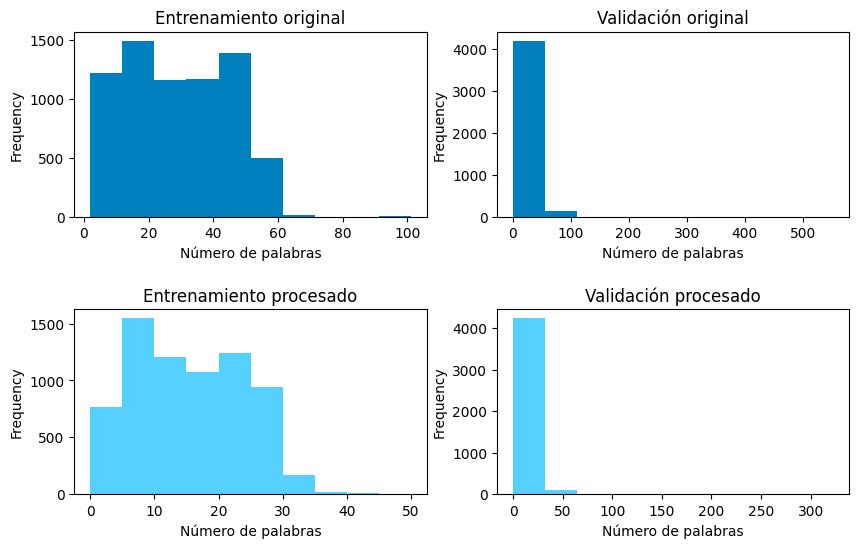

In [6]:
# Create a grid for 4 charts
fig, ax = plt.subplots(2, 2, figsize=(10,6))

# X and Y labels
ax[0][0].set_xlabel("Número de palabras")
ax[0][1].set_xlabel("Número de palabras")
ax[1][0].set_xlabel("Número de palabras")
ax[1][1].set_xlabel("Número de palabras")

# Char frequency for ORIGINAL texts in training and testing datasets
(training_df["text"].str.split().map(lambda x: len(x))).plot(
    ax=ax[0][0],
    kind="hist", 
    grid=False, 
    color="#0080bf", 
    title="Entrenamiento original")
(testing_df["text"].str.split().map(lambda x: len(x))).plot(
    ax=ax[0][1],
    kind="hist", 
    grid=False, 
    color="#0080bf", 
    title="Validación original")

# Char frequency for PROCESSED texts in training and testing datasets
(training_df["cleaned_text"].str.split().map(lambda x: len(x))).plot(
    ax=ax[1][0],
    kind="hist", 
    grid=False, 
    color="#55d0ff", 
    title="Entrenamiento procesado")
(testing_df["cleaned_text"].str.split().map(lambda x: len(x))).plot(
    ax=ax[1][1],
    kind="hist", 
    grid=False, 
    color="#55d0ff", 
    title="Validación procesado")

# Add some vertical space between plots
fig.subplots_adjust(hspace=0.5)

### 9.3. Nube de palabras

En este subapartado se pretende representar gráficamente los **términos de mayor frecuencia** empleando el conjunto de **datos procesados**, puesto que al contener únicamente las palabras que en principio aportan más información útil, el resultado será estadísticamente más significativo. Tal y como se aprecia en la siguiente nube de palabras, en el conjunto de **entrenamiento** destacan principalmente por su tamaño los términos relacionados a los **dos géneros** principales: hombres y mujeres. Una posible teoría podría ser la existencia tanto de frases que alaban al sexo masculino como otras que degradan al género femenino. Adicionalmente aparecen en un mayor tamaño **verbos comunes** tales como *ser*, *mirar/parecer*, *hacer*... muy relacionados con la mayoría de expresiones denigrantes y violentas contra las mujeres.

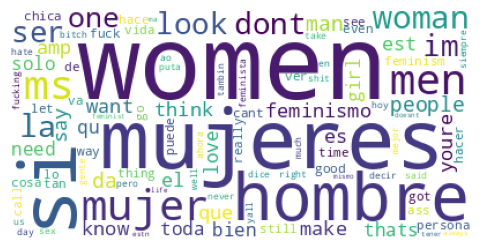

In [7]:
# Set a wordcloud chart with a white background and 100 words max
word_cloud_object = WordCloud(
    background_color="white",
    max_words=100)

# Create a wordcloud chart with the training dataset
training_wordcloud = word_cloud_object.generate(str(list(training_df["cleaned_text"].values)))

# Plot settings
fig = plt.figure(1, figsize=(10,3))
plt.axis('off')
plt.imshow(training_wordcloud)
plt.show()

En la siguiente gráfica se aprecia la **misma tendencia** con el conjunto de **validación procesado** siendo viable la aplicación de las conclusiones obtenidas anteriormente.

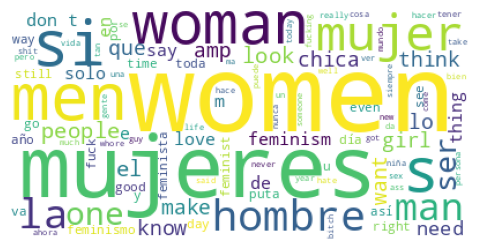

In [11]:
# Set a wordcloud chart with a white background and 100 words max
word_cloud_object = WordCloud(
    background_color="white",
    max_words=100)

# Create a wordcloud chart with the training dataset
wordcloud = word_cloud_object.generate(str(list(testing_df["cleaned_text"].values)))

# Plot settings
fig = plt.figure(1, figsize=(10,3))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

### 9.4. Análisis de n-gramas

Con la siguiente función se persigue el propósito de dividir los documentos de **entrenamiento** en un conjunto de frases con hasta **N palabras** de modo que se pueda calcular y conocer la **frecuencia de las expresiones** resultantes. Pueden ser tanto bigramas con dos palabras, trigramas con tres conceptos y así hasta el número de términos deseado. Tras realizar diversas pruebas, a mayor valor mejor comprensión de los temas que tratan las expresiones más frecuentes, y por ende se establece este valor a 10.

En el conjunto de **entrenamiento** únicamente se encuentran opiniones de usuarios de **Twitter** y por lo tanto las temáticas son de diversa índole, como comentarios machistas acerca de los **cuerpos de las mujeres y los roles** que pueden desempeñar. Sin embargo, los 10-gramas resultantes en el conjunto de **validación** en el que existen más fuentes de datos parece existir una **mayor amplitud de tópicos** siendo los mayoritarios **noticias** acerca de violencia hacia la mujeres.

In [8]:
training_df["cleaned_text"]

0       she calls antifeminazi shut fucking vile comme...
1       now back women brave beautiful these bad ass b...
2                        wow skirt short what length inch
3       incredible beautifulbut laughed much read drif...
4       find extremely hard believe kelly yr old mum w...
                              ...                        
6972    estamos igual pareja puedes besar amistades pa...
6973                                       hijo mil putas
6974    seguramente esta chica no cobra el dinero que ...
6975                              madre dice va fea agree
6976    en casas tambin tenis tradicin mierda mujeres ...
Name: cleaned_text, Length: 6977, dtype: object

In [9]:
# Top 20 most frequent 10-grams in the training dataset
list(get_top_ngrams(training_df, "cleaned_text", 10) \
    .drop_duplicates(subset=["cleaned_text"])["ngrams"].values)[0:20]

['and looking cool sex farting and kicking ass big fake',
 'un pesebresi en realidad la navidad es un recordatorio de',
 'las nias mujeres deben ser respetadas no son cosas desechables',
 'ein officehe dey dey beg fees deadline extension wey stella',
 'es ancha la puerta espacioso el camino que lleva la',
 'la piel de gallinasigo emocionadallorando gritando porq lo logramospor las',
 'casualmenteerael unico en su univrso paraleloque teniaacceso tu eres mi',
 'alejandro juan manuel por sus ocurrencias hacerme reir como nadie',
 'anywhere on their body especially if you are famous or',
 'para darles cargos polticos despus criticis la ministra al decir',
 'es un criminal perverso psicopata genocidano se conmueve de asesinar',
 'bitch nice shower goes along way making feel less like',
 'time in wisconsinhe and no am not tired of winning',
 'secret love song shout out to my ex touch power',
 'gener incomodidad pnico ac gente aca tambien va llegar por',
 'que partido visto apaga consola anda

In [10]:
# Top 20 most frequent 10-grams in the testing dataset
list(get_top_ngrams(testing_df, "cleaned_text", 10) \
    .drop_duplicates(subset=["cleaned_text"])["ngrams"].values)[0:20]

['beg bend dnc rnc anyone decide youve done enough year',
 'ancestors victimized christians respect jews jews disrespect hate christians jews',
 'midair unconnected everything else rather phenomena paid somehow less lower',
 'creada prncipe bernardo holanda dirigentes eeuu europa pudieran mantener conversaciones',
 'cualquier pas desaparecern el jbilo kissinger ilustres cofrades plenamente justificado',
 'active member jewish community slavetrader business partner firm cohen isaacs',
 'term completely understand youre coming womens fault genetic desires but',
 'whore conastantly trying cock block begoff pissoff understood leave me',
 'sodomize homosexualize psychically actualknow if homosexuals even allowed table obviously',
 'financiar conspiracin neonazi logr derrocar gobierno las tropas barrieron capital',
 'nacionalizados drogan violan chica alicante magreb detenido el ejido tras',
 'tvs duopolio mset haciendo juicio paralelo machacando abogado defensa cumplir',
 'clothes act like 

### 9.5. Análisis de sentimientos

Finalizando el análisis exploratorio se procede a identificar el **sentimiento de cada texto** para comprobar la polaridad existente **por categorías**. Presumiblemente la hipótesis más factible es que la mayor parte de documentos fuesen clasificados como negativos, a excepción de la categoría *non-sexist*. Si bien existen multitud de mecanismos de **detección de sentimientos**, en este EDA se procede a utilizar un **modelo SVM pre-entrenado** perteneciente a la librería *textblob*.

Tal y como se aprecia en el siguiente resultado empleando el conjunto de **entrenamiento**, en todas las categorías el **sentimiento predominante es el neutral** por una amplia diferencia de documentos. Adicionalmente, el segundo sentimiento mayoritario es el positivo a excepción de la clase *misogyny-non-sexual-violence*. Si bien una primera explicación de este fenómeno podría residir en la falta de precisión del modelo pre-entrenado, gracias a los artículos relacionados con la temática conocemos la especial **dificultad** que residen en la **detección y clasificación del sexismo**. Al ser altamente **dependiente del lenguaje**, a menos que se utilicen expresiones y términos considerablemente negativos y violentos, la identificación de textos puede llegar a ser una actividad muy confusa para un sistema automático.

In [5]:
# Sentiment analysis using the training dataset
get_sentiments(training_df, "task2", "cleaned_text")

{'misogyny-non-sexual-violence': {'neu': 453, 'neg': 124, 'pos': 108},
 'ideological-inequality': {'neu': 527, 'pos': 189, 'neg': 150},
 'objectification': {'neu': 299, 'pos': 126, 'neg': 75},
 'stereotyping-dominance': {'neu': 497, 'pos': 179, 'neg': 133},
 'sexual-violence': {'neu': 232, 'pos': 178, 'neg': 107},
 'non-sexist': {'neu': 2044, 'pos': 969, 'neg': 587}}

Una **tendencia similar** a la anterior ocurre con el análisis de sentimientos aplicado al conjunto de **validación**, en el que el sentimiento mayoritario es el neutral para todas las clases mientras que el segundo más voluminoso es el positivo a excepción de la categoría *misogyny-non-sexual-violence*.

In [6]:
# Sentiment analysis using the testing dataset
get_sentiments(testing_df, "task2", "cleaned_text")

{'misogyny-non-sexual-violence': {'neu': 303, 'neg': 109, 'pos': 60},
 'ideological-inequality': {'neu': 337, 'pos': 160, 'neg': 124},
 'objectification': {'neu': 200, 'pos': 70, 'neg': 54},
 'stereotyping-dominance': {'neu': 251, 'pos': 127, 'neg': 86},
 'sexual-violence': {'neu': 219, 'pos': 114, 'neg': 67},
 'non-sexist': {'neu': 1218, 'pos': 542, 'neg': 327}}

## 10. Conclusiones finales

En este último apartado se recopilan los aspectos más relevantes acerca de los conjuntos de datos *EXIST* a modo resumen del notebook completo.

* **Fuentes de datos**: Twitter y Gab.
* **Método de búsqueda** por expresiones y términos sexistas, en **inglés y español**, propuestos por trabajos en áreas similares, expertos en la materia, cuentas de redes sociales, etc.
* Técnicas de **procesamiento y balanceo de idiomas** aplicadas únicamente sobre **Twitter**, ya que apenas existe población de Gab.
* **Etiquetado de datos** mediante varios equipos de expertos de menor a mayor experiencia.
* **Clases balanceadas** tanto en detección como en clasificación de sexismo.
* El conjunto de **entrenamiento** únicamente dispone de **tweets**, mientras que el de validación se compone de documentos procedentes de sendas fuentes de datos.
* Técnicas de **procesamiento de textos** ayudan a **normalizar y reducir** el número y frecuencia tanto de caracteres como de palabras.
* En el conjunto de **validación** existe una mayor diversidad de documentos, siendo en su mayoría **noticias** sobre **violencia de género**.
* Prácticamente la totalidad de los **documentos** son clasificados como **neutrales** por su falta de negatividad y violencia en sus términos, lo que parece que dificultará su detección en este problema de clasificación.